In [1]:
import os
import numpy as np
import pandas as pd
from skimage import io as skio
import datasetdatabase as dsdb
from aicsfeature.extractor import dna
from aicsimage import io, processing

# Multiprocessing

os.environ["DSDB_PROCESS_LIMIT"] = "16"

### Load metadata

In [3]:
prod = dsdb.DatasetDatabase(config='/allen/aics/assay-dev/Analysis/QCB_database/prod_config.json')
ds_meta = prod.get_dataset(name='QCB_cell_meta')

Reconstructing dataset...
[============================================================] 100.0% 10116/10116 ~ 0:0:0 remaining


In [4]:
ds_meta.ds.head()

,cell_id,cell_ver,czi_filename,idx_in_stack,mitosis,mode,roi,src_csv,src_csv_row,str_ver,structure_name
0,c17a53d0-7ff6-4106-ab53-d2be3240f168,0.1.0,20161209_C01_002.czi,3,0,n,"[19, 195, 332, 513, 65, 295]",//allen/aics/assay-dev/StashSpreadsheets/assay...,7,0.1.0,FBL
1,77f11f0d-66d9-49c5-b2b8-be40777780ed,0.1.0,20161209_C01_002.czi,4,0,n,"[19, 187, 264, 453, 226, 444]",//allen/aics/assay-dev/StashSpreadsheets/assay...,8,0.1.0,FBL
2,427284a7-02b2-440b-a1b0-28c0b8f12379,0.1.0,20161209_C01_002.czi,5,0,n,"[19, 190, 73, 322, 422, 613]",//allen/aics/assay-dev/StashSpreadsheets/assay...,9,0.1.0,FBL
3,0241af5b-4133-4525-9d14-9a65f8a93f6f,0.1.0,20161209_C01_002.czi,7,0,n,"[19, 195, 355, 594, 68, 397]",//allen/aics/assay-dev/StashSpreadsheets/assay...,11,0.1.0,FBL
4,a705b03f-7af4-4fba-9e8f-8b20b085a1ab,0.1.0,20161209_C01_003.czi,1,0,n,"[8, 189, 78, 297, 228, 481]",//allen/aics/assay-dev/StashSpreadsheets/assay...,15,0.1.0,FBL


In [5]:
df_meta = ds_meta.ds

In [6]:
df_meta.columns

Index(['cell_id', 'cell_ver', 'czi_filename', 'idx_in_stack', 'mitosis',
       'mode', 'roi', 'src_csv', 'src_csv_row', 'str_ver', 'structure_name'],
      dtype='object')

### Calculating DNA properties for the first cell (cid = 0)

In [7]:
rootf = '/allen/aics/assay-dev/Analysis/QCB_database/cell_info'

In [8]:
cid = 0

In [9]:
seg_path = os.path.join(rootf,df_meta.cell_id[cid],'seg.ome.tif')
raw_path = os.path.join(rootf,df_meta.cell_id[cid],'raw.ome.tif')
print(seg_path)

/allen/aics/assay-dev/Analysis/QCB_database/cell_info/c17a53d0-7ff6-4106-ab53-d2be3240f168/seg.ome.tif


In [10]:
SEG = skio.imread(seg_path)
RAW = skio.imread(raw_path)
print('seg',SEG.shape,'raw',RAW.shape)

seg (5, 176, 181, 230) raw (3, 176, 181, 230)


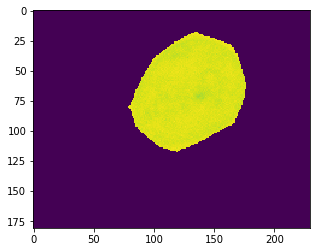

In [11]:
import matplotlib.pyplot as plt
plt.imshow(RAW[0,70,:,:]*SEG[0,70,:,:]) # channels: 0-dna, 1-mem
plt.show()

In [20]:
tablef = dna.GetFeatures(None,seg=RAW[0,:,:,:]*SEG[0,:,:,:])

In [21]:
tablef.head()

,dna_volume,dna_surface_area,dna_1st_axis_x,dna_1st_axis_y,dna_1st_axis_z,dna_2nd_axis_x,dna_2nd_axis_y,dna_2nd_axis_z,dna_3rd_axis_x,dna_3rd_axis_y,...,dna_haralick_variance,dna_haralick_inv_diff_moment,dna_haralick_sum_avg,dna_haralick_sum_var,dna_haralick_sum_entropy,dna_haralick_entropy,dna_haralick_diff_var,dna_haralick_diff_entropy,dna_haralick_info_corr1,dna_haralick_info_corr2
0,431389,28756,0.60344,-0.698648,0.384383,0.018198,0.493981,0.869282,-0.797201,-0.517565,...,12.002209,0.293643,450.585358,33.458324,4.547036,7.396518,0.00057,3.045633,-0.046323,0.460142


### Comparing with old features

In [18]:
ds_cell = prod.get_dataset(name='QCB_feature_old')

Reconstructing dataset...
[============================================================] 100.0% 10116/10116 ~ 0:0:0 remaining


In [19]:
df_cell = ds_cell.ds
df_cell.head()

,cell_EquatorialEccentricity,cell_MeridionalEccentricity,cell_centroid_x,cell_centroid_x_norm,cell_centroid_y,cell_centroid_y_norm,cell_centroid_z,cell_centroid_z_norm,cell_first_axis_length,cell_first_axis_length_norm,...,struct_psize_mean,struct_psize_mean_roof,struct_psize_std,struct_psize_std_roof,struct_seg_vol,struct_seg_vol_roof,struct_surface_area,struct_surface_area_pixel,struct_surface_area_pixel_roof,struct_surface_area_roof
0,0.954248,0.992144,410.196840,0.107601,200.282480,0.074716,99.909683,0.213683,267.127038,1.341748,...,34105.0,34105.0,0.000000,0.000000,34105.0,34105.0,15.864813,12594.0,12594.0,15.864813
1,0.919504,0.993980,358.856377,0.045385,337.198618,-0.002020,100.529134,0.091619,276.640338,1.426584,...,14025.5,14025.5,4545.989496,4545.989496,28051.0,28051.0,12.981332,10305.0,10305.0,12.981332
2,0.891845,0.942940,186.607216,0.122459,528.397690,0.013015,114.846968,0.097995,202.939604,1.587060,...,48642.0,48642.0,0.000000,0.000000,48642.0,48642.0,21.961819,17434.0,17434.0,21.961819
3,0.879992,0.989685,466.355636,-0.067556,262.586578,0.182389,133.596876,0.100411,330.426213,1.435130,...,51096.0,51096.0,0.000000,0.000000,51096.0,51096.0,22.376264,17763.0,17763.0,22.376264
4,0.953563,0.980214,185.472376,-0.041318,367.911661,-0.065170,83.981297,0.083976,307.129410,1.230440,...,24726.5,24726.5,29488.474100,29488.474100,49453.0,49453.0,20.496774,16271.0,16271.0,20.496774


#### Volume

In [23]:
print('New: ', tablef.dna_volume[cid],'Old: ',df_cell.dna_seg_vol[cid])

New:  431389 Old:  431389.0


#### DNA Heralick contrast

In [24]:
# New and old Haralick features are different because they don't use the same values of distance
print('New: ', tablef.dna_haralick_contrast[cid],'Old: ',df_cell.dna_Haralick_Contrast[cid])

New:  14.550511507508123 Old:  8.971945862


#### DNA 1st axis length

In [25]:
print('New: ', tablef.dna_1st_axis_length[cid],'Old: ',df_cell.dna_first_axis_length[cid])

New:  109.33765815382043 Old:  109.33765819999999
